<a href="https://colab.research.google.com/github/ma850419/Various_scripts/blob/main/Mapping_Brazilian_Archaeological_Sites_(ZooarchBR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

openai_to_z_challenge_path = kagglehub.competition_download('openai-to-z-challenge')
nikitamanaenkov_brazilian_zooarch_database_zooarchbr_path = kagglehub.dataset_download('nikitamanaenkov/brazilian-zooarch-database-zooarchbr')

print('Data source import complete.')


100%|██████████| 287/287 [00:00<00:00, 546kB/s]

Extracting files...


100%|██████████| 317k/317k [00:00<00:00, 82.3MB/s]

Extracting files...
Data source import complete.


In [5]:
!pip install odfpy folium geopy networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=1875ab6f3a0d2fac2d43193e03276dc67be81d8aac13cd5d755ff0135992840e
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


In [7]:
import pandas as pd
import folium
import re
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
import os
print(os.listdir("/content/drive/My Drive"))


['GPSpoints_Meten_Pine.dbf', 'GPSpoints_Meten_Pine.shx', 'GPSpoints_Meten_Pine.sbn', 'GPSpoints_Meten_Pine.sbx', 'GPSpoints_Meten_Pine.shp', 'GPSpoints_Meten_Pine.shp.xml', 'GPSpoints_Meten_Pine.prj', 'subikono3b.aux', 'PHotos.zip', 'CV_Mohamad_Awad_2014.doc', 'Water_and_soil.kml', 'Chris_table.xls', 'Chris_table.xls.gsheet', 'Arabic Answerphone.wav', 'Figure1_revised_vect.svg', 'Crop Classification Using Multi-Date Sentinel 1 Images in Bekaa Valley Lebanon_comments_revised_by_me_14_Jan_2019[5839].docx', 'bassem', 'Monthly Data Kfarhata 2011.xls', '2019', 'Geo - Master2.gsheet', 'C:\\Users\\new\\Documents\\Sentinel1andSentinel2', 'Folder', 'Landsat5', 'exportTableExample.csv', 'Snow', 'EarthEngine', 'export_Points', 'anyFolder', 'ndviFolder', 'vectorsToDriveExample.kml', 'vectorsToDriveExample2.kml', '2019-5-18C1.tif', 'Colab Notebooks', 'Test_Folder', 'DNB0_2018-05-01.tif', 'palsar_20_2020-01-01_vol.tif', 'palsar_20_2007-01-01_vol.tif', 'palsar_20_2020-01-01_new.tif', 'palsar_20_2020-

In [11]:
def dms_to_dd(dms):
    if pd.isnull(dms): return None
    match = re.match(r"(\d+)°([EWNS]) (\d+)' (\d+)", str(dms))
    if not match: return None
    deg, dir_, min_, sec = match.groups()
    dd = float(deg) + float(min_)/60 + float(sec)/3600
    if dir_ in ['S', 'W']:
        dd *= -1
    return dd

file_path = "/content/drive/MyDrive/Archeology/Fossile et al. Table 3 (Rev.SAB) - Archaeological Sites.ods"
df = pd.read_excel(file_path, engine="odf")

sites = []
for idx, row in df.iterrows():
    name = row['Archaeological site (*approximate coordinate)']
    lon_str = row['Datum SIRGAS2000 (*approximate coordinate)']
    lat_str = row['Unnamed: 6']
    lon = dms_to_dd(lon_str)
    lat = dms_to_dd(lat_str)
    if lon is not None and lat is not None:
        sites.append({'name': name, 'lat': lat, 'lon': lon})

m = folium.Map(location=[-14.2, -51.9], zoom_start=4)
for site in sites:
    folium.Marker(
        [site['lat'], site['lon']],
        popup=site['name']
    ).add_to(m)

m.save('brazil_sites_map.html')
m

    ID Archaeological site (*approximate coordinate)           State  \
0  NaN                                           NaN             NaN   
1  1.0                                Areias Grandes  Santa Catarina   
2  2.0                             Areias Pequenas I  Santa Catarina   
3  3.0                                  Barra do Sul  Santa Catarina   
4  4.0                                      Bupeva I  Santa Catarina   

             Biome Cultural Attribution  \
0              NaN                  NaN   
1  Atlantic Forest             Sambaqui   
2  Atlantic Forest             Sambaqui   
3  Atlantic Forest             Sambaqui   
4  Atlantic Forest             Sambaqui   

  Datum SIRGAS2000 (*approximate coordinate)    Unnamed: 6  \
0                                  Longitude      Latitude   
1                               48°W 39' 48"  26°S 23' 18"   
2                               48°W 41' 20"  26°S 21' 54"   
3                               48°W 36' 32"  26°S 27' 59"  

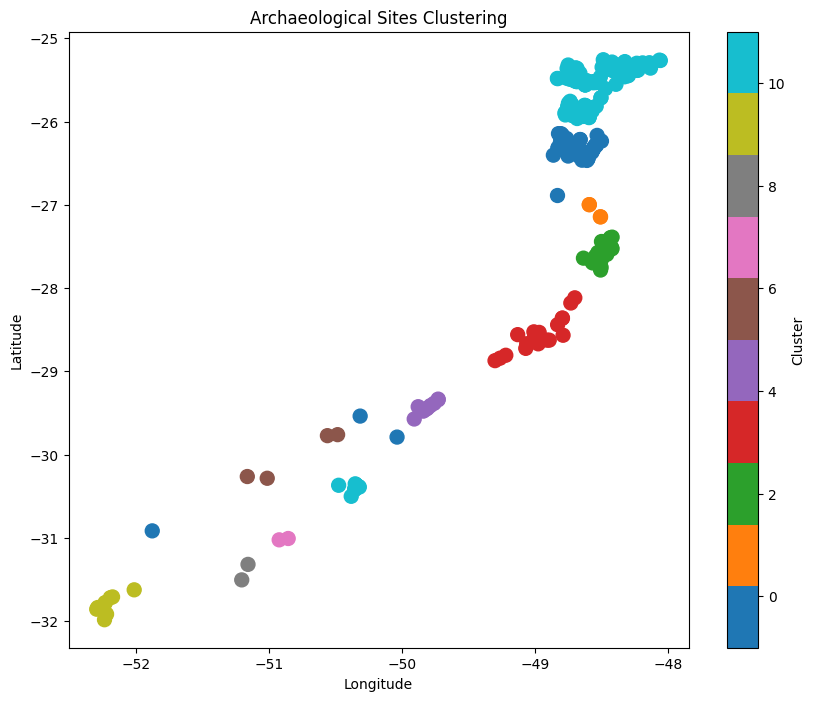

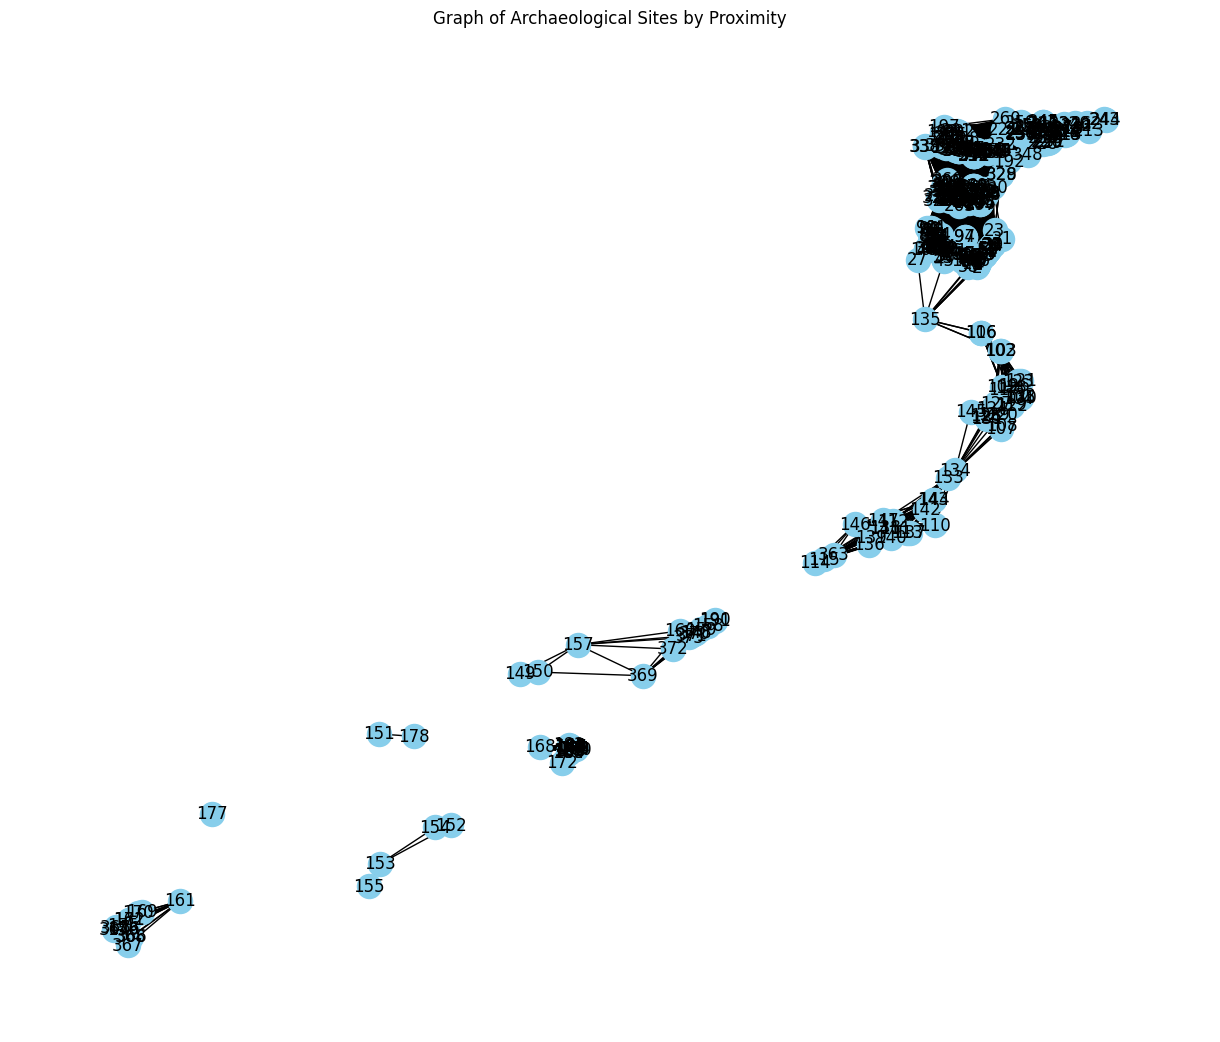

Possible new point near the cluster 0: [-26.31949891 -48.69270425]
Possible new point near the cluster 1: [-27.07076389 -48.54909722]
Possible new point near the cluster 2: [-27.57205808 -48.49239899]
Possible new point near the cluster 3: [-28.56247222 -48.97001389]
Possible new point near the cluster 4: [-29.43038889 -49.80883333]
Possible new point near the cluster 5: [-29.76680556 -50.52416667]
Possible new point near the cluster 6: [-30.27430556 -51.09055556]
Possible new point near the cluster 7: [-31.01638889 -50.89166667]
Possible new point near the cluster 8: [-31.4125     -51.18388889]
Possible new point near the cluster 9: [-31.81985043 -52.22534188]
Possible new point near the cluster 10: [-30.38984722 -50.35306944]
Possible new point near the cluster 11: [-25.59548733 -48.55853964]


In [17]:
file_path = "/content/drive/MyDrive/Archeology/Fossile et al. Table 3 (Rev.SAB) - Archaeological Sites.ods"
#file_path = "/kaggle/input/brazilian-zooarch-database-zooarchbr/Fossile et al. Table 3 (Rev.SAB) - Archaeological Sites.ods"
df = pd.read_excel(file_path, engine="odf")
def dms_to_dd(dms):
    import re
    if pd.isnull(dms): return None
    match = re.match(r"(\d+)°([EWNS]) (\d+)' (\d+)", str(dms))
    if not match: return None
    deg, dir_, min_, sec = match.groups()
    dd = float(deg) + float(min_)/60 + float(sec)/3600
    if dir_ in ['S', 'W']:
        dd *= -1
    return dd

coords = []
names = []
print(df.head())
for idx, row in df.iterrows():
    name = row['Archaeological site (*approximate coordinate)']
    lon_str = row['Datum SIRGAS2000 (*approximate coordinate)']
    lat_str = row['Unnamed: 6']
    lon = dms_to_dd(lon_str)
    lat = dms_to_dd(lat_str)
    if lon is not None and lat is not None:
        coords.append([lat, lon])
        names.append(name)

coords = np.array(coords)

clustering = DBSCAN(eps=0.2, min_samples=2).fit(coords)

plt.figure(figsize=(10,8))
plt.scatter(coords[:,1], coords[:,0], c=clustering.labels_, cmap='tab10', s=100, label='Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Archaeological Sites Clustering')
plt.colorbar(label='Cluster')
plt.show()

G = nx.Graph()
for i, name in enumerate(names):
    G.add_node(i, label=name, pos=(coords[i,1], coords[i,0]))

for i in range(len(coords)):
    for j in range(i+1, len(coords)):
        dist = np.linalg.norm(coords[i] - coords[j])
        if dist < 0.5:
            G.add_edge(i, j, weight=dist)

pos = {i: (coords[i,1], coords[i,0]) for i in range(len(coords))}
plt.figure(figsize=(12,10))
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue')
plt.title('Graph of Archaeological Sites by Proximity')
plt.show()


unique_labels = set(clustering.labels_)
for label in unique_labels:
    if label == -1:
        continue
    cluster_coords = coords[clustering.labels_ == label]
    centroid = cluster_coords.mean(axis=0)
    print(f"Possible new point near the cluster {label}: {centroid}")